In [63]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [64]:
data=pd.read_csv( 'credit_card_default_analysis.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл:

    - LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)
    - SEX: пол клиента (1 = мужской, 2 = женский )
    - EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).
    - MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).
    - AGE: возраст в годах
    - PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)
    - BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь
    - PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре
    - default - индикатор невозврата денежных средств

# 1 Задание

    1) Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: 
        a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки 
        b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

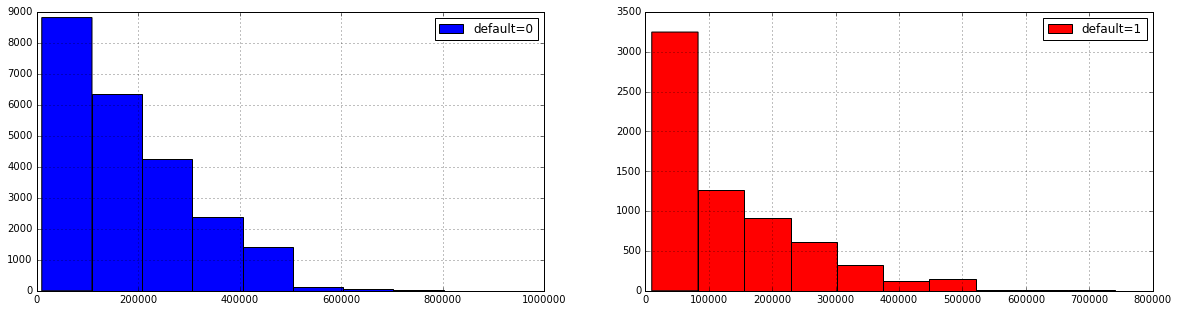

In [65]:
pylab.figure(figsize(20, 5))
pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(data[data.default == 0].LIMIT_BAL, bins = 10, color = 'b', label = 'default=0')
pylab.legend()


pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(data[data.default == 1].LIMIT_BAL, bins = 10, color = 'r', label = 'default=1')
pylab.legend()

pylab.show()

### Гипотеза: 
<ul><li>H0 - медианы пересекаются.</li>
          <li>H1 - медианы не пересекаются.</li>
          </ul>

In [66]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

scores_1 = map(np.median, get_bootstrap_samples(data[data.default==0].LIMIT_BAL.values, 1000))
scores_2 = map(np.median, get_bootstrap_samples(data[data.default==1].LIMIT_BAL.values, 1000))
print (stat_intervals(scores_1, 0.05) - stat_intervals(scores_2, 0.05))

[ 70000.  60000.]


##### Вывод 1.1: Т.к значения смещены относительно 0 то медианы не пересекаюся.

### Гипотеза:
<ul>
    <li>
    H0 - распределения равны (с применением оценки равенства средних)
    </li>
    <li>
    H1 - распределения не равны.
    </li>
</ul>

###### а) Проверка распределения на нормальность (Тест Шапиро-Уилка)

In [67]:
print "first:",(scipy.stats.shapiro(data[data.default == 0].LIMIT_BAL))[1], '\n','second:', (scipy.stats.shapiro(data[data.default == 1].LIMIT_BAL))[1]

first: 0.0 
second: 0.0


###### б) Так как распределения не являются нормальными то в данном случае применим критерий Манна Уитни

In [68]:
scipy.stats.mannwhitneyu(data[data.default==0].LIMIT_BAL, data[data.default==1].LIMIT_BAL)

MannwhitneyuResult(statistic=95786286.5, pvalue=3.4348973226457305e-189)

##### Вывод 1.2: Принимаем альтерн6ативу против нулевой гипотезы - распределения не равны.

### Общий вывод: Распределение невыплачивающих кредиты более резко растет к сниижению кредитного лимита

   # 2 задание
Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)
   

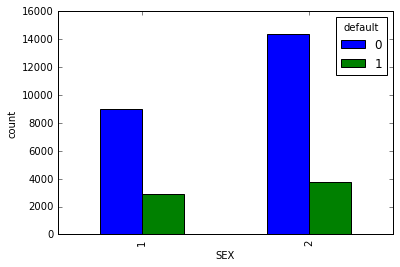

In [69]:
%matplotlib inline
pd.crosstab(data.SEX,data.default).plot(kind='bar')
plt.xlabel('SEX')
plt.ylabel('count')
plt.show()


Визуально видно, что среди женщин больше количество тех, кто не возвращал кредит. Проверим эту гипотезу

### Гипотеза:
    - H0 - гендерный состав не отличается (доли равны)
    - H1 - гендерный состав отличается (доли отличны)

##### Проверим с применением критерием для оценки долей: Статистический критерий - Z-критерий для разности долей в несвязанных выборках.

In [70]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [71]:
print 'p_value = ',proportions_diff_z_test(proportions_diff_z_stat_ind(data[data.default==0].SEX - 1, data[data.default==1].SEX - 1)), '<< 0.05'


p_value =  4.47286652161e-12 << 0.05


### Вывод: Отклоняем H0 - гендерный состав отличается

# 3 задание
Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности, где значением ячейки была бы разность между количеством человек вернувших и не вернувших долг по каждому из значений образования. 
- Похожи ли значения в этой таблице? 
- Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости? 
- Наличие какого образования является наилучшим индикатором того, что человек отдаст долг? 
- Наоборт, не отдаст долг?

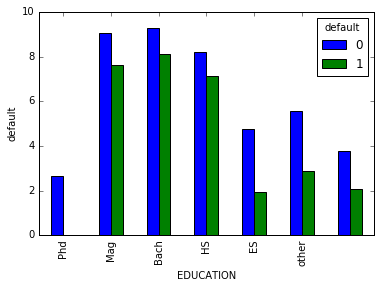

In [72]:
pd.crosstab(data.EDUCATION,data.default).apply(lambda x: log(x), axis=1).plot(kind='bar')
plt.xlabel('EDUCATION')
plt.ylabel('default')
plt.xticks(range(6), ['Phd', 'Mag', 'Bach','HS','ES','other','n/a'])
plt.show()

In [73]:
pd.crosstab(data.default,data.EDUCATION)

EDUCATION,0,1,2,3,4,5,6
default,,,,,,,
0,14,8549,10700,3680,116,262,43
1,0,2036,3330,1237,7,18,8


### Гипотеза:
    - H0 - Уровень образования не влияет на отдачу кредитов
    - H1 - Уровень образования влияет на отдачу кредитов

In [74]:
print 'p-value:', scipy.stats.chi2_contingency(pd.crosstab(data.default,data.EDUCATION))[1], '<< 0.05'

p-value: 1.23326262454e-32 << 0.05


### Вывод:Уровень образования влияет на отдачу кредитов

# 4 Задание
Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.


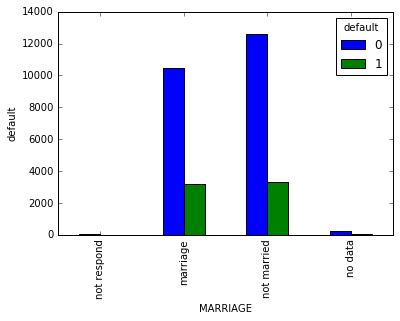

In [75]:
pd.crosstab(data.MARRIAGE,data.default).plot(kind='bar')
plt.xlabel('MARRIAGE')
plt.ylabel('default')
plt.xticks(range(4), ['not respond', 'marriage', 'not married','no data'])
plt.show()

In [76]:
pd.crosstab(data.default, data.MARRIAGE)

MARRIAGE,0,1,2,3
default,,,,
0,49,10453,12623,239
1,5,3206,3341,84


### Гипотеза:
    H0 - семейное положение не влияет на отдачу кредитов
    H1 - семейное положение влияет на отдачу.

In [77]:
print 'p-value:', scipy.stats.chi2_contingency(pd.crosstab(data.default, data.MARRIAGE))[1], '<< 0.05'

p-value: 8.82586245758e-08 << 0.05


### Вывод: семейный статус влияет на отдачу кредитов.

# 5 Задание

Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: 
  - о равенстве медианных значений возрастов людей.
  - о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних.
  
  Значимы ли полученные результаты с практической точки зрения ?

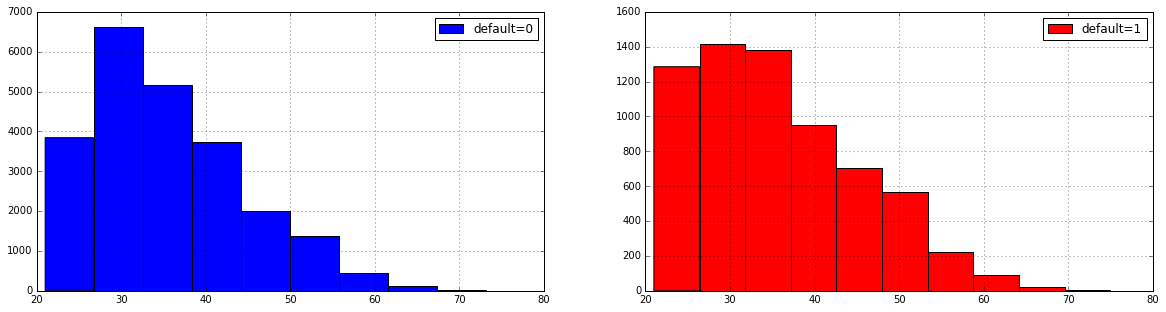

In [78]:
pylab.figure(figsize(20, 5))
pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(data[data.default == 0].AGE, bins = 10, color = 'b', label = 'default=0')
pylab.legend()


pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(data[data.default == 1].AGE, bins = 10, color = 'r', label = 'default=1')
pylab.legend()

pylab.show()

### Гипотеза:
 - H0 - медианы равны
 - H1 - медианы не равны

In [79]:
scores_1 = map(np.median, get_bootstrap_samples(data[data.default==0].AGE.values, 1000))
scores_2 = map(np.median, get_bootstrap_samples(data[data.default==1].AGE.values, 1000))

print (stat_intervals(scores_1, 0.05) - stat_intervals(scores_2, 0.05))

[ 0. -1.]


### Вывод 5.1 - В диапазон входит 0, H0 - отвергнуть нельзя.

### Гипотеза:
 - H0 - средние распределений равны
 - H1 - средние распределений не равны

In [80]:
print 'p-value: ',scipy.stats.mannwhitneyu(data[data.default==0].AGE, data[data.default==1].AGE)[1] , '> 0.05'

p-value:  0.372769895924 > 0.05


### Вывод 5.2 - , H0 - отвергнуть нельзя.

### Вывод 5 Так как и медианы и распределения равны в пределах уровня значимости. То показатель возраст не влияет на модель.